## Assignment 1 - Working with time series data

## Requirements
In this excercise you will load the dataset provided below into a Python Pandas dataframe and calculate some basic statistics. 
You should calculate the median and standard deviation for each place of measurement.
You need to do this by implementing your own algoritm. 
Then you should visualize each time series for respective places in the same figure. 
The x-axis should have the correct time index indicated in the figure. 
The excercise will be 10% of the of the final grade. See slides for Day 2 for more info.
Delivery: a .ipynb file. It would be helpful if you describe the problems you encountered during the work with the assignment directly in the end of the file.
You can find the data set you should use here:


### Step 1: Importing Python Packages

In [3]:
import pandas as pd # data analysis and exploration library
import numpy as np  # numerical Python for numerical compuation
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns
import datetime  # time package

sns.set()

### Step 2: Loading Dataset

In [4]:
df = pd.read_csv('https://data.melbourne.vic.gov.au/api/views/ez6b-syvw/rows.csv')

### Step 3: Some basic exploring data

In [7]:
# reading the first five items: 
df.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position
0,12/15/2014 01:40:00 AM,0013a20040b4b755,1,508,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20141215014000,NaN
1,12/15/2014 01:40:00 AM,0013a20040b516ed,1,505,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,ENV,-37.813073,144.980406,29.91,Fitzroy Gardens,505-20141215014000,NaN
2,12/15/2014 01:45:00 AM,0013a20040b516f6,1,507,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,ENV,-37.814922,144.982258,38.79,Fitzroy Gardens,507-20141215014500,NaN
3,12/15/2014 01:45:00 AM,0013a20040b5b318,1,502,21.3,21.3,21.3,97.4,97.4,97.4,45.3,45.3,45.3,ENV,-37.814610,144.979018,22.57,Fitzroy Gardens,502-20141215014500,NaN
4,12/15/2014 01:45:00 AM,0013a20040b315ec,1,501,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,ENV,-37.814808,144.980999,29.96,Fitzroy Gardens,501-20141215014500,NaN


In [8]:
# Checking the columns or attributes or fields or features of the dataset
df.columns

Index(['timestamp', 'mac', 'boardtype', 'boardid', 'temp_max', 'temp_min',
       'temp_avg', 'light_max', 'light_min', 'light_avg', 'humidity_min',
       'humidity_max', 'humidity_avg', 'model', 'latitude', 'longitude',
       'elevation', 'location', 'rowid', 'Position'],
      dtype='object')

In [9]:
# Getting info from the data set using info method
# Based on the info method there is no missing values except position

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     56570 non-null  object 
 1   mac           56570 non-null  object 
 2   boardtype     56570 non-null  int64  
 3   boardid       56570 non-null  int64  
 4   temp_max      56570 non-null  float64
 5   temp_min      56570 non-null  float64
 6   temp_avg      56570 non-null  float64
 7   light_max     56570 non-null  float64
 8   light_min     56570 non-null  float64
 9   light_avg     56570 non-null  float64
 10  humidity_min  56570 non-null  float64
 11  humidity_max  56570 non-null  float64
 12  humidity_avg  56570 non-null  float64
 13  model         56570 non-null  object 
 14  latitude      56570 non-null  float64
 15  longitude     56570 non-null  float64
 16  elevation     34975 non-null  float64
 17  location      56570 non-null  object 
 18  rowid         56570 non-nu

### Step 4: Median and SD for each place of measurement

In [9]:
# The position column has null values, let us drop it first and calculate the descriptive statistics of the dataset

df.drop('Position', axis=1).describe()

,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,latitude,longitude,elevation
count,56570.0,56570.000000,56570.000000,56570.000000,56570.000000,56570.000000,56570.000000,56570.000000,56570.000000,56570.000000,56570.000000,56570.000000,56570.000000,34975.000000
mean,1.0,507.918738,18.522650,18.522650,18.522650,48.674527,48.674527,48.674527,49.431043,49.431043,49.431043,-37.818444,144.950806,12.973810
std,0.0,2.673337,5.498701,5.498701,5.498701,43.973493,43.973493,43.973493,13.413633,13.413633,13.413633,0.002513,0.017177,14.777655
min,1.0,501.000000,4.200000,4.200000,4.200000,0.000000,0.000000,0.000000,-24.900000,-24.900000,-24.900000,-37.820354,144.940482,0.030000
25%,1.0,506.000000,14.800000,14.800000,14.800000,2.900000,2.900000,2.900000,41.700000,41.700000,41.700000,-37.819904,144.940485,0.030000
50%,1.0,509.000000,17.700000,17.700000,17.700000,49.900000,49.900000,49.900000,51.000000,51.000000,51.000000,-37.819712,144.941325,2.740000
75%,1.0,510.000000,21.900000,21.900000,21.900000,94.900000,94.900000,94.900000,58.700000,58.700000,58.700000,-37.814922,144.979018,29.910000
max,1.0,511.000000,45.200000,45.200000,45.200000,98.700000,98.700000,98.700000,102.500000,102.500000,102.500000,-37.813073,144.982258,38.790000


In [11]:
df['location'].value_counts()

Docklands Library    42381
Fitzroy Gardens      14189
Name: location, dtype: int64

In [12]:
d, f = df['location'].value_counts().values
total = df.shape[0]
print('Docklands Library:', (d/total) * 100)
print('Fitzroy Gardens:',  (f/total) * 100)

Docklands Library: 74.91780095456956
Fitzroy Gardens: 25.082199045430443


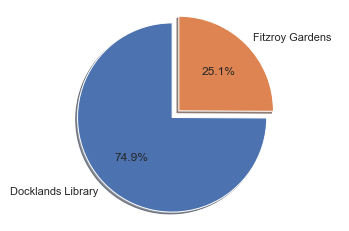

In [13]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Docklands Library', 'Fitzroy Gardens '
sizes = [d, f]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Step 5: Categorizing by location using Boolean indexing

In [14]:
# Docklands Library location
col = ['timestamp', 'temp_max', 'temp_min','temp_avg', 'light_max', 'light_min', 'light_avg', 'humidity_min','humidity_max', 'humidity_avg']
df_docland_lib = df[col][df['location'] == 'Docklands Library']

In [15]:
df_docland_lib.head(4)

,timestamp,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg
11,12/15/2014 03:55:00 AM,23.5,23.5,23.5,94.8,94.8,94.8,44.5,44.5,44.5
12,12/15/2014 03:55:00 AM,23.5,23.5,23.5,96.3,96.3,96.3,43.1,43.1,43.1
13,12/15/2014 04:00:00 AM,24.2,24.2,24.2,97.6,97.6,97.6,43.4,43.4,43.4
14,12/15/2014 04:00:00 AM,22.9,22.9,22.9,97.8,97.8,97.8,46.6,46.6,46.6


In [16]:
df_docland_lib.describe()

,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg
count,42381.000000,42381.000000,42381.000000,42381.000000,42381.000000,42381.000000,42381.000000,42381.000000,42381.000000
mean,18.094958,18.094958,18.094958,46.782945,46.782945,46.782945,50.355846,50.355846,50.355846
std,5.667560,5.667560,5.667560,43.965244,43.965244,43.965244,11.880782,11.880782,11.880782
min,4.200000,4.200000,4.200000,0.600000,0.600000,0.600000,-24.900000,-24.900000,-24.900000
25%,14.200000,14.200000,14.200000,3.000000,3.000000,3.000000,43.100000,43.100000,43.100000
50%,17.400000,17.400000,17.400000,13.100000,13.100000,13.100000,51.900000,51.900000,51.900000
75%,21.300000,21.300000,21.300000,95.400000,95.400000,95.400000,59.200000,59.200000,59.200000
max,45.200000,45.200000,45.200000,98.700000,98.700000,98.700000,74.300000,74.300000,74.300000


In [17]:
# Fitzroy Gardens location
df_fitzroy_gardens = df[col][df['location'] == 'Fitzroy Gardens']
df_fitzroy_gardens.describe()

,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg
count,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000
mean,19.800120,19.800120,19.800120,54.324477,54.324477,54.324477,46.668757,46.668757,46.668757
std,4.735746,4.735746,4.735746,43.512744,43.512744,43.512744,16.898745,16.898745,16.898745
min,8.400000,8.400000,8.400000,0.000000,0.000000,0.000000,-24.900000,-24.900000,-24.900000
25%,16.500000,16.500000,16.500000,2.400000,2.400000,2.400000,37.400000,37.400000,37.400000
50%,19.000000,19.000000,19.000000,83.900000,83.900000,83.900000,47.700000,47.700000,47.700000
75%,22.600000,22.600000,22.600000,94.000000,94.000000,94.000000,57.000000,57.000000,57.000000
max,37.100000,37.100000,37.100000,98.300000,98.300000,98.300000,102.500000,102.500000,102.500000


In [18]:
df.groupby('location')[col].mean()

,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg
location,,,,,,,,,
Docklands Library,18.094958,18.094958,18.094958,46.782945,46.782945,46.782945,50.355846,50.355846,50.355846
Fitzroy Gardens,19.800120,19.800120,19.800120,54.324477,54.324477,54.324477,46.668757,46.668757,46.668757


In [19]:
df.groupby('location')[col].median()

,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg
location,,,,,,,,,
Docklands Library,17.4,17.4,17.4,13.1,13.1,13.1,51.9,51.9,51.9
Fitzroy Gardens,19.0,19.0,19.0,83.9,83.9,83.9,47.7,47.7,47.7


In [20]:
df.groupby('location')[col].std()

,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg
location,,,,,,,,,
Docklands Library,5.667560,5.667560,5.667560,43.965244,43.965244,43.965244,11.880782,11.880782,11.880782
Fitzroy Gardens,4.735746,4.735746,4.735746,43.512744,43.512744,43.512744,16.898745,16.898745,16.898745


In [21]:
df['timestamp'].head(60)

0     12/15/2014 01:40:00 AM
1     12/15/2014 01:40:00 AM
2     12/15/2014 01:45:00 AM
3     12/15/2014 01:45:00 AM
4     12/15/2014 01:45:00 AM
5     12/15/2014 01:50:00 AM
6     12/15/2014 01:55:00 AM
7     12/15/2014 01:55:00 AM
8     12/15/2014 01:55:00 AM
9     12/15/2014 02:00:00 AM
10    12/15/2014 02:00:00 AM
11    12/15/2014 03:55:00 AM
12    12/15/2014 03:55:00 AM
13    12/15/2014 04:00:00 AM
14    12/15/2014 04:00:00 AM
15    12/15/2014 04:05:00 AM
16    12/15/2014 04:05:00 AM
17    12/15/2014 04:10:00 AM
18    12/15/2014 04:10:00 AM
19    12/15/2014 04:20:00 AM
20    12/15/2014 04:30:00 AM
21    12/15/2014 04:55:00 AM
22    12/15/2014 05:20:00 AM
23    12/15/2014 05:40:00 AM
24    12/15/2014 05:45:00 AM
25    12/15/2014 05:50:00 AM
26    12/15/2014 05:55:00 AM
27    12/15/2014 06:05:00 AM
28    12/15/2014 06:05:00 AM
29    12/15/2014 06:10:00 AM
30    12/15/2014 06:15:00 AM
31    12/15/2014 06:15:00 AM
32    12/15/2014 06:25:00 AM
33    12/15/2014 06:35:00 AM
34    12/15/20

In [23]:
# plt.plot(df['timestamp'], df['temp_max'])
# plt.show()

In [24]:
# columns = ['temp_max','temp_min', 'temp_avg', 'light_max', 'light_min', 'light_avg', 'humidity_min', 'humidity_max', 'humidity_avg']

In [25]:
# %m %d %Y %p

In [27]:
date_string = '12/15/2014 08:45:00 AM'

In [28]:
df['timestamp'].tail(60)

56510    06/05/2015 02:10:00 AM
56511    06/05/2015 02:20:00 AM
56512    06/05/2015 02:30:00 AM
56513    06/05/2015 02:50:00 AM
56514    06/05/2015 03:45:00 AM
56515    06/05/2015 04:05:00 AM
56516    04/23/2015 04:40:00 AM
56517    04/24/2015 02:10:00 AM
56518    04/25/2015 04:00:00 AM
56519    04/28/2015 02:45:00 AM
56520    05/02/2015 02:05:00 AM
56521    05/02/2015 02:45:00 AM
56522    05/02/2015 03:25:00 AM
56523    05/06/2015 03:35:00 AM
56524    05/06/2015 03:45:00 AM
56525    05/06/2015 03:55:00 AM
56526    05/06/2015 04:05:00 AM
56527    05/06/2015 04:15:00 AM
56528    05/06/2015 04:25:00 AM
56529    05/06/2015 04:35:00 AM
56530    05/06/2015 04:50:00 AM
56531    05/06/2015 05:00:00 AM
56532    05/06/2015 05:20:00 AM
56533    05/11/2015 04:45:00 AM
56534    05/11/2015 06:15:00 AM
56535    05/12/2015 02:15:00 AM
56536    05/12/2015 02:35:00 AM
56537    05/13/2015 04:35:00 AM
56538    05/13/2015 05:05:00 AM
56539    05/27/2015 02:55:00 AM
56540    05/27/2015 04:55:00 AM
56541   

In [29]:
def date_string_to_dateformat(date_string):
    return datetime.datetime.strptime(date_string, '%m/%d/%Y %H:%M:%S %p' )

In [30]:
dates = [date_string_to_dateformat(date) for date in df['timestamp']]

In [31]:
# formatting the the date column of the Docland Library
df_docland_lib['time'] = [date_string_to_dateformat(time) for time in df_docland_lib['timestamp']]
df_fitzroy_gardens['time'] = [date_string_to_dateformat(time) for time in df_fitzroy_gardens['timestamp']]

df_docland_lib

,timestamp,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,time
11,12/15/2014 03:55:00 AM,23.5,23.5,23.5,94.8,94.8,94.8,44.5,44.5,44.5,2014-12-15 03:55:00
12,12/15/2014 03:55:00 AM,23.5,23.5,23.5,96.3,96.3,96.3,43.1,43.1,43.1,2014-12-15 03:55:00
13,12/15/2014 04:00:00 AM,24.2,24.2,24.2,97.6,97.6,97.6,43.4,43.4,43.4,2014-12-15 04:00:00
14,12/15/2014 04:00:00 AM,22.9,22.9,22.9,97.8,97.8,97.8,46.6,46.6,46.6,2014-12-15 04:00:00
15,12/15/2014 04:05:00 AM,24.5,24.5,24.5,98.2,98.2,98.2,44.5,44.5,44.5,2014-12-15 04:05:00
...,...,...,...,...,...,...,...,...,...,...,...
56565,06/04/2015 04:15:00 AM,6.1,6.1,6.1,7.1,7.1,7.1,52.2,52.2,52.2,2015-06-04 04:15:00
56566,06/04/2015 04:25:00 AM,6.1,6.1,6.1,7.1,7.1,7.1,52.4,52.4,52.4,2015-06-04 04:25:00
56567,06/04/2015 04:45:00 AM,6.1,6.1,6.1,7.2,7.2,7.2,52.2,52.2,52.2,2015-06-04 04:45:00
56568,06/04/2015 06:10:00 AM,5.8,5.8,5.8,7.3,7.3,7.3,52.2,52.2,52.2,2015-06-04 06:10:00


 ## Step 6: Visualising

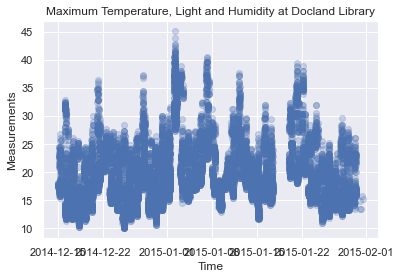

In [32]:
# plt.scatter(dates,df['temp_avg'] )
plt.scatter(df_docland_lib['time'][:15000],df_docland_lib['temp_max'][:15000], alpha=0.25)
# plt.scatter(df_docland_lib['time'],df_docland_lib['light_max'])
# plt.scatter(df_docland_lib['time'],df_docland_lib['humidity_max'])
plt.title('Maximum Temperature, Light and Humidity at Docland Library')
plt.xlabel('Time')
plt.ylabel('Measurements')
plt.show()

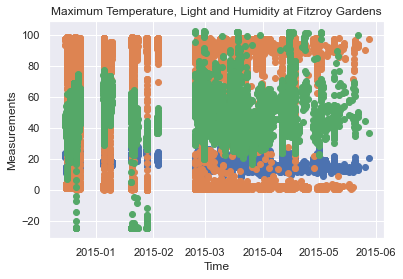

In [33]:
plt.scatter(df_fitzroy_gardens['time'],df_fitzroy_gardens['temp_max'])
plt.scatter(df_fitzroy_gardens['time'],df_fitzroy_gardens['light_max'])
plt.scatter(df_fitzroy_gardens['time'],df_fitzroy_gardens['humidity_max'])
plt.title('Maximum Temperature, Light and Humidity at Fitzroy Gardens')
plt.xlabel('Time')
plt.ylabel('Measurements')
plt.show()

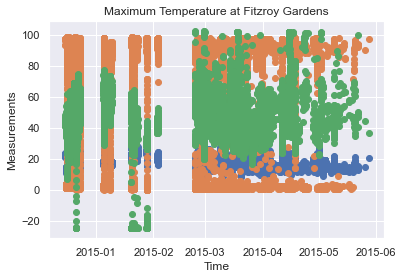

In [34]:
plt.scatter(df_fitzroy_gardens['time'],df_fitzroy_gardens['temp_min'])
plt.scatter(df_fitzroy_gardens['time'],df_fitzroy_gardens['light_min'])
plt.scatter(df_fitzroy_gardens['time'],df_fitzroy_gardens['humidity_min'])
plt.title('Maximum Temperature at Fitzroy Gardens')
plt.xlabel('Time')
plt.ylabel('Measurements')
plt.show()

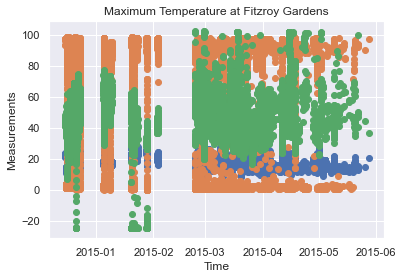

In [35]:
plt.scatter(df_fitzroy_gardens['time'],df_fitzroy_gardens['temp_avg'])
plt.scatter(df_fitzroy_gardens['time'],df_fitzroy_gardens['light_avg'])
plt.scatter(df_fitzroy_gardens['time'],df_fitzroy_gardens['humidity_avg'])
plt.title('Maximum Temperature at Fitzroy Gardens')
plt.xlabel('Time')
plt.ylabel('Measurements')
plt.show()